# Exploring neuron morphology

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json

We have utility functions for loading annotation data from either swc files or from the mouselight json files that will return two dataframes, one for axons, one for dendrites.

In [2]:
from load_data import load_annotation, load_mouselight

We'll look at the first neuron in the mouselight dataset

In [67]:
(axons, dendrites) = load_mouselight('AA0001')

In [4]:
len(axons)

11145

In [5]:
len(dendrites)

954

In [7]:
axons.head(n=10)

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId
0,1,1,4625.382188,2534.794722,2977.331688,1,-1,974
1,2,2,4626.080429,2543.495381,2998.328900,1,1,974
2,3,2,4627.360984,2543.799307,3003.055208,1,2,974
3,4,2,4626.503281,2549.596586,3005.326501,1,3,974
4,5,2,4626.503281,2549.089941,3005.326501,1,4,974
5,6,2,4628.507748,2550.609878,3006.830280,1,5,974
6,7,2,4630.512215,2552.889782,3009.837838,1,6,974
7,8,2,4630.791512,2552.679250,3014.062886,1,7,974
8,9,2,4629.789278,2554.199186,3016.819814,1,8,974
9,10,2,4627.931296,2560.000373,3018.840477,1,9,974


The first row of this is different from the others? Why is that?

For each node (row) we can see the id of the node it is connected to in the 'parentNumber' column. This allows us to put the nodes together.

In [23]:
i=1
parent_number = axons.parentNumber[i]
parent_index = axons[axons.sampleNumber==parent_number].index.values[0]
print(parent_index, parent_number)

0 1


We can plot this inter node segment, we'll just look at two dimensions for now:

Text(0, 0.5, 'Y (um)')

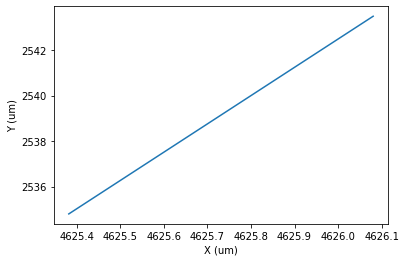

In [17]:
plt.plot([axons.x[i], axons.x[parent_index]], [axons.y[i], axons.y[parent_index]])
plt.xlabel("X (um)")
plt.ylabel("Y (um)")

We can calculate the length of this inter node segment

In [19]:
point1 = np.array((axons.x[parent_index], axons.y[parent_index], axons.z[parent_index])).flatten()
point2 = np.array((axons.x[i], axons.y[i], axons.z[i])).flatten()
length = np.linalg.norm(point2-point1)
print(length)

22.739215551849377


We can string a sequence of nodes together. Let's look at the first 10 points - still only looking at 2-D in our visualization:

Text(0, 0.5, 'Y (um)')

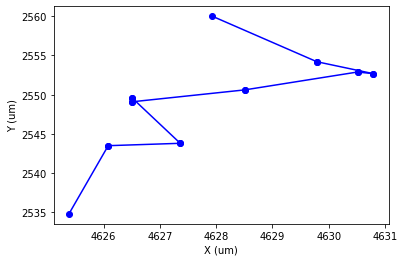

In [29]:
for i in range(1,10):
    parent_number = axons.parentNumber[i]
    parent_index = axons[axons.sampleNumber==parent_number].index.values[0]
    plt.plot([axons.x[i], axons.x[parent_index]], [axons.y[i], axons.y[parent_index]], 'bo-')
plt.xlabel("X (um)")
plt.ylabel("Y (um)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise** Plot all of the axons in 2-dimensions</div>

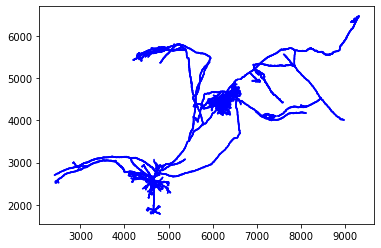

In [31]:
#delete this solution
for index, row in axons[1:].iterrows():
    parent = axons[axons.sampleNumber==row.parentNumber].index
    plt.plot([axons.x[parent].values[0], row.x], [axons.y[parent].values[0], row.y], color='b')
plt.xlabel("X (um)")
plt.ylabel("Y (um)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise** Plot all of the dendrites in 2-dimensions</div>

Time to make a 3-D plot!

Text(0.5, 0, 'z (um)')

<Figure size 576x576 with 0 Axes>

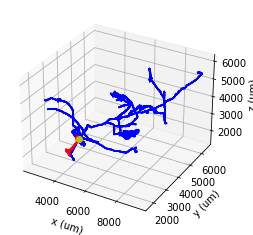

In [7]:
#3D plot of axons and dendrites
plt.figure(figsize=(8,8))
ax = plt.figure().add_subplot(projection='3d')
for index, row in axons[1:].iterrows():
    parent = axons[axons.sampleNumber==row.parentNumber].index
    ax.plot([axons.x[parent].values[0], row.x], [axons.y[parent].values[0], row.y], [axons.z[parent].values[0], row.z], color='b')
for index, row in dendrites[1:].iterrows():
    parent = dendrites[dendrites.sampleNumber==row.parentNumber].index
    ax.plot([dendrites.x[parent].values[0], row.x], [dendrites.y[parent].values[0], row.y], [dendrites.z[parent].values[0], row.z], color='r')
ax.plot(axons.x.loc[0], axons.y.loc[0], axons.z.loc[0], color='y', marker='o')
ax.set_xlabel("x (um)")
ax.set_ylabel("y (um)")
ax.set_zlabel("z (um)")

In [8]:
def plot_two_axes(first_axis, second_axis):
    for index, row in axons[1:].iterrows():
        parent = axons[axons.sampleNumber==row.parentNumber].index
        plt.plot([axons[first_axis][parent].values[0], row[first_axis]], [axons[second_axis][parent].values[0], row[second_axis]], color='b')
    for index, row in dendrites[1:].iterrows():
        parent = dendrites[dendrites.sampleNumber==row.parentNumber].index
        plt.plot([dendrites[first_axis][parent].values[0], row[first_axis]], [dendrites[second_axis][parent].values[0], row[second_axis]], color='r')
    plt.plot(axons[first_axis].loc[0], axons[second_axis].loc[0], color='y', marker='o')
    plt.xlabel(first_axis + " (um)")
    plt.ylabel(second_axis + " (um)")

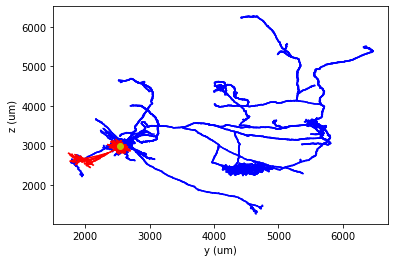

In [9]:
plot_two_axes("y", "z")

## Find axon end points
You probably noticed that there are multiple branches for both the axons and the dendrites. How can we determine when one branch ends and another one starts?
Probably the easiest way is to look at where the parentNumber for a node is not the immediately preceding node.

In [47]:
axons.head()

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId
0,1,1,4625.382188,2534.794722,2977.331688,1,-1,974
1,2,2,4626.080429,2543.495381,2998.328900,1,1,974
2,3,2,4627.360984,2543.799307,3003.055208,1,2,974
3,4,2,4626.503281,2549.596586,3005.326501,1,3,974
4,5,2,4626.503281,2549.089941,3005.326501,1,4,974


Text(0, 0.5, 'Parent numer')

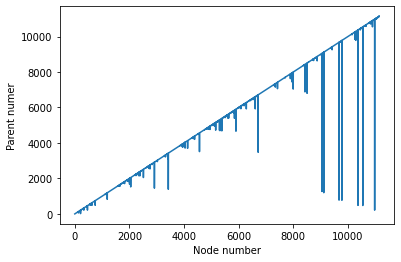

In [33]:
plt.plot(axons.parentNumber.values)
plt.xlabel("Node number")
plt.ylabel("Parent numer")

In [41]:
(axons.sampleNumber - axons.parentNumber).values>1

array([ True, False, False, ..., False,  True, False])

In [59]:
new_branch_pts = np.argwhere((axons.sampleNumber - axons.parentNumber).values>1).flatten()
new_branch_pts[:5]

array([  0,  27, 131, 134, 188])

In [46]:
axons.loc[129:133]

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId
129,130,2,4110.141245,2697.642742,3063.994718,1,129,648
130,131,2,4111.672079,2688.837601,3057.765261,1,130,648
131,132,2,4283.301734,2708.305912,2972.119775,1,96,648
132,133,2,4283.474586,2717.746783,2972.150395,1,132,648
133,134,2,4283.474586,2723.319883,2972.150395,1,133,648


In [50]:
len(new_branch_pts)

392

In [60]:
endpoints = new_branch_pts - 1

# Calculate the length of one axon branch
Can we trace one axon branch of this neuron and calculate it's length

Let's write a function that will calculate the length between nodes

In [70]:
def calculate_segment_length(data):
    lengtharray = np.zeros(len(data))
    for index, row in data[1:].iterrows():
        parent = data[data.sampleNumber==row.parentNumber].index
        length = np.sqrt(((data.x[parent]-row.x)**2) + ((data.y[parent]-row.y)**2) + ((data.z[parent]-row.z)**2))
        lengtharray[index] = length
    return(lengtharray)

We can use this to calculate the length of the first axon branch

In [62]:
new_branch_pts[0]

0

In [63]:
new_branch_pts[1]

27

In [73]:
length_array = calculate_segment_length(axons.loc[new_branch_pts[0]:new_branch_pts[1]])

<ipython-input-70-56610406150c>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lengtharray[index] = length


In [76]:
print(length_array)
length_array.sum()

[ 0.         22.73921555  4.90613672  6.28513153  0.506645    2.93077544
  4.27331954  4.23950013  3.30383572  6.41786143  4.23868376  3.30383541
  3.22962043  1.35398816  8.43700086  4.04186334  6.36217711  6.14119679
  5.75196245  3.76256704  3.93667174  3.78920433  6.73985911  4.94813913
  3.65419366  5.70054445  7.85302573  2.68189856]


141.5288531206733

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise** Calculate the total length of all axons. Do this for dendrites too.</div>

# CCF locations
For the mouselight data, the last column of our dataframe is 'allenId' which is the ID of the CCF structure of that node. We can use this to identify the location of the neuron and its processes.

First, load in the ccf_structures dataframe

In [81]:
ccf_structures = pd.read_csv('/data/allen_mouse_ccf/annotation/adult_mouse_ccf_structures.csv')

In [82]:
ccf_structures.head()

,id,name,acronym,hemisphere_id,parent_structure_id,graph_order,structure_id_path,color_hex_triplet
0,1000,extrapyramidal fiber systems,eps,3,1009.0,1218,/997/1009/1000/,CCCCCC
1,223,Arcuate hypothalamic nucleus,ARH,3,157.0,733,/997/8/343/1129/1097/157/223/,FF5D50
2,12998,"Somatosensory areas, layer 6b",SS6b,3,453.0,36,/997/8/567/688/695/315/453/12998/,188064
3,163,"Agranular insular area, posterior part, layer 2/3",AIp2/3,3,111.0,287,/997/8/567/688/695/315/95/111/163/,219866
4,552,"Pontine reticular nucleus, ventral part",PRNv,3,987.0,914,/997/8/343/1065/771/987/552/,FFBA86


Let's find where our soma is located. The soma is the first row of both the axons and the dendrites dataframes. 

In [78]:
axons.allenId.loc[0]

974

In [83]:
ccf_structures[ccf_structures.id==974]

,id,name,acronym,hemisphere_id,parent_structure_id,graph_order,structure_id_path,color_hex_triplet
1139,974,"Primary somatosensory area, mouth, layer 5",SSp-m5,3,345.0,76,/997/8/567/688/695/315/453/322/345/974/,188064


So this neuron's soma was in 'SSp-m5' part of the primary somatosensory area

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise** For each axon endpoint, identify the CCF structure of that endpoint</div>

In [85]:
#delete solution
end_structure_id = axons.loc[endpoints[1:]].allenId.unique()
for structure in end_structure_id:
    print(ccf_structures[ccf_structures.id==structure].acronym.values)

['SSp-ul5']
['MOp5']
['SSp-m5']
['SSp-m6a']
['VISC5']
['CP']
['ec']
['PO']
['SPFp']
['MRN']
['VM']
['VPMpc']
['RE']
['HY']
['PSTN']
['PG']
['fiber tracts']
['int']
['RT']
['TH']
['SSp-ul6b']
['SSp-ul6a']
['scwm']
['MOp6a']
['MOs5']
['MOs6a']
['FRP6a']
['ORBl6a']
['FRP5']
['SSp-m1']
['SSp-ul1']
['SSp-un1']
['SSp-ul2/3']


# ADD VISUALIZATION WITH CCF 
I do not know how to do this so someone else has to do this piece

## Which neurons are in which CCF structure

Let's make a DataFrame of all the mouselight neurons with the ccf id and structure acronym for the soma location. This can help you identify neurons in particular brain structures.

In [86]:
soma_locations = pd.DataFrame(columns=("neuron_id","soma_ccf_id",
                                       "soma_acronym"), index=range(1,1507))

for i in range(1,1507):
    neuron = 'AA'+str(i).zfill(4)
    soma_locations.neuron_id.loc[i] = neuron
    try:
        (axons, dendrites) = load_mouselight(neuron)
        locid = axons.allenId.loc[0]
        soma_locations.soma_ccf_id.loc[i] = locid
        if np.isfinite(locid):
            soma_locations.soma_acronym.loc[i] = ccf_structures[ccf_structures.id==locid].acronym.values[0]
    except:
        pass

In [87]:
soma_locations.head()

,neuron_id,soma_ccf_id,soma_acronym
1,AA0001,974,SSp-m5
2,AA0002,648,MOp5
3,AA0003,943,MOp2/3
4,AA0004,648,MOp5
5,AA0005,844,MOp6a


In [88]:
for ccfid in soma_locations.soma_ccf_id.unique():
    try:
        print(ccf_structures[ccf_structures.id==ccfid].acronym.values[0],len(soma_locations[soma_locations.soma_ccf_id==ccfid]))
    except:
        pass

SSp-m5 6
MOp5 21
MOp2/3 10
MOp6a 13
SSp-ul2/3 2
MOs5 158
MOs6a 63
MOs2/3 67
AV 11
BST 4
fi 2
SUB 76
POST 30
dhc 22
AMd 3
fp 8
VISp6a 4
VISp4 2
PCN 11
VAL 42
PO 15
CL 13
MD 13
fr 1
alv 2
CA1 27
ORBl5 5
ORBl6a 7
cing 4
ACAd5 10
AD 2
CM 1
IAD 1
sm 1
PVi 2
DMH 2
HY 12
mtt 2
VISp6b 4
RE 2
PR 2
VMH 1
DG-sg 12
SBPV 1
AHN 4
ACAd6a 18
ProS 18
ZI 16
VPMpc 4
VM 10
DG-mo 34
DG-po 7
PVH 1
PeF 4
PRE 62
MB 14
PAL 5
LHA 19
PH 4
nst 2
pm 1
or 10
ACAd2/3 5
fa 3
ccg 1
root 3
HPF 1
CA3 11
VPM 25
VPL 11
MOs1 17
FRP6a 3
LD 9
LP 2
FRP5 2
PL5 3
ORBvl6a 3
RT 5
PL2/3 3
FN 2
MY 12
arb 5
PAG 1
IRN 7
PL6a 2
VISp5 5
ICe 3
PARN 6
mlf 1
DR 1
PGRNl 1
ll 1
PRNr 3
PRNc 2
P 8
MRN 10
SPIV 2
MDRNd 2
ENTm6 1
TU 1
MOp1 6
FRP1 2
SMT 1
VISli6a 1
VISl6a 5
VISl6b 2
fx 1
MOs6b 1
PIL 3
TH 1
POL 2
int 6
PoT 1
ACAv6a 1
ACAv5 7
ACAv2/3 2
ACAv1 1
ccb 1
AUDd5 1
PIR 10
BMAa 3
ORBvl2/3 1
MMd 9
MMme 7
PSTN 1
MMl 1
AUDp5 1
SGN 1
mfb 1
SSp-bfd5 4
V 1
SPVI 26
MDRNv 2
LRNm 2
IG 2
COApl 1
LSr 2
CENT3 3
FL 2
COPY 4
PYR 2
CUL4, 5 2
SIM 8
CENT2 2

### Some interesting questions to explore:

- What kind of metrics can you quantify to describe a neuron's morphology?
- Can you cluster these metrics to identify different morphological types?
- How do the morphologies of neurons in different brain structure differ?
- Can we learn anything about connectivity or projection patterns with this data?
